In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('data/sm_data_features.csv')


# set default options for libraries:

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_style("white")
sns.set_palette("mako")

In [20]:
df1.columns

Index(['ChEMBL ID', 'InChI Key', 'Name', 'SMILES', 'Type', 'Max Phase',
       'Targets', 'Bioactivities', 'MW', 'LogP', 'MolMR', 'H Donors',
       'H Acceptors', 'TPSA', 'Heavy Atom Count', 'Aromatic Rings',
       'Rotatable Bonds', 'Ring Count'],
      dtype='object')

## Exploratory analysis of small molecules
#### Max Phase - 1 = Phase 1, 2 = Phase 2, 3 = Phase 3, 4 = Approved

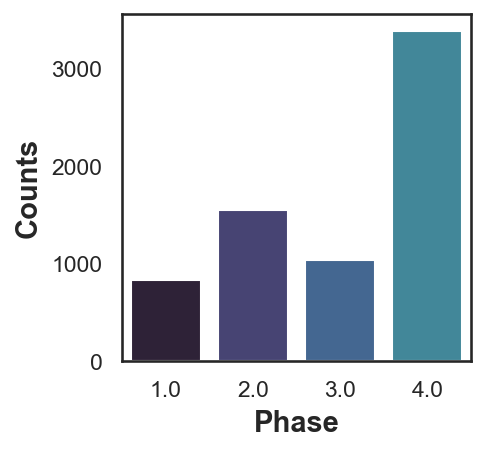

In [22]:
plt.figure(figsize=(3,3))

sns.countplot(x='Max Phase', data=df1)
plt.xlabel('Phase', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=14, fontweight='bold')

plt.show()

### Correlation analysis of molecular features

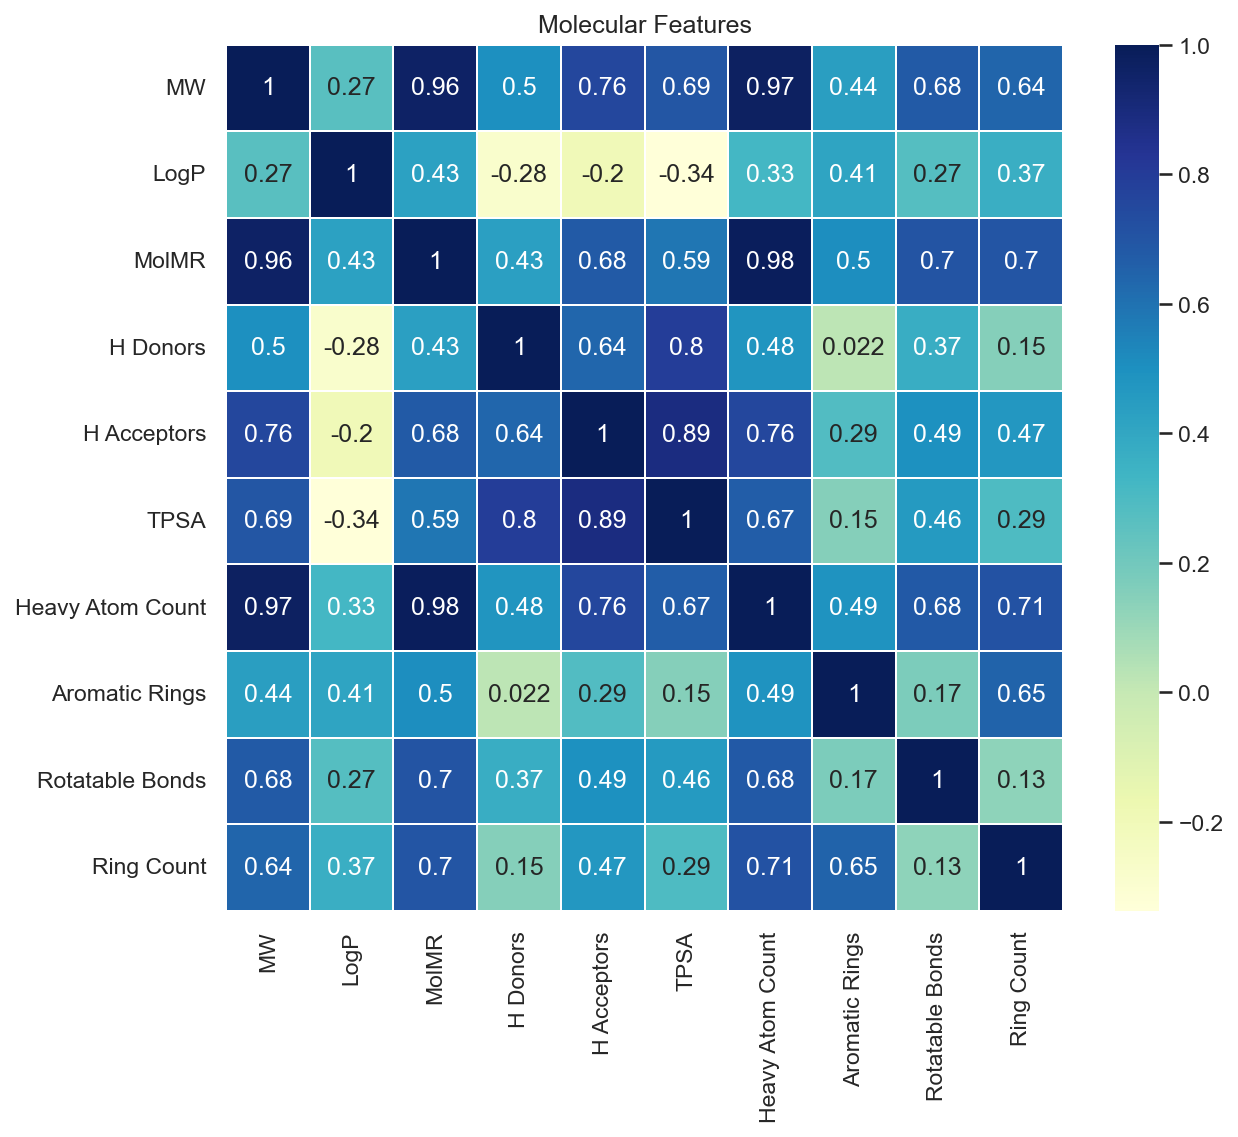

In [31]:
plt.figure(figsize=(9,7.5))

df1_subset1 = df1[['MW', 'LogP', 'MolMR', 'H Donors',
       'H Acceptors', 'TPSA', 'Heavy Atom Count', 'Aromatic Rings',
       'Rotatable Bonds', 'Ring Count']]


sns.heatmap(df1_subset1.corr(numeric_only=True), linewidth=.1, annot=True, cmap='YlGnBu')
plt.title('Molecular Features')
plt.show()

## Correlation graphs for molecular features

<Figure size 1050x750 with 0 Axes>

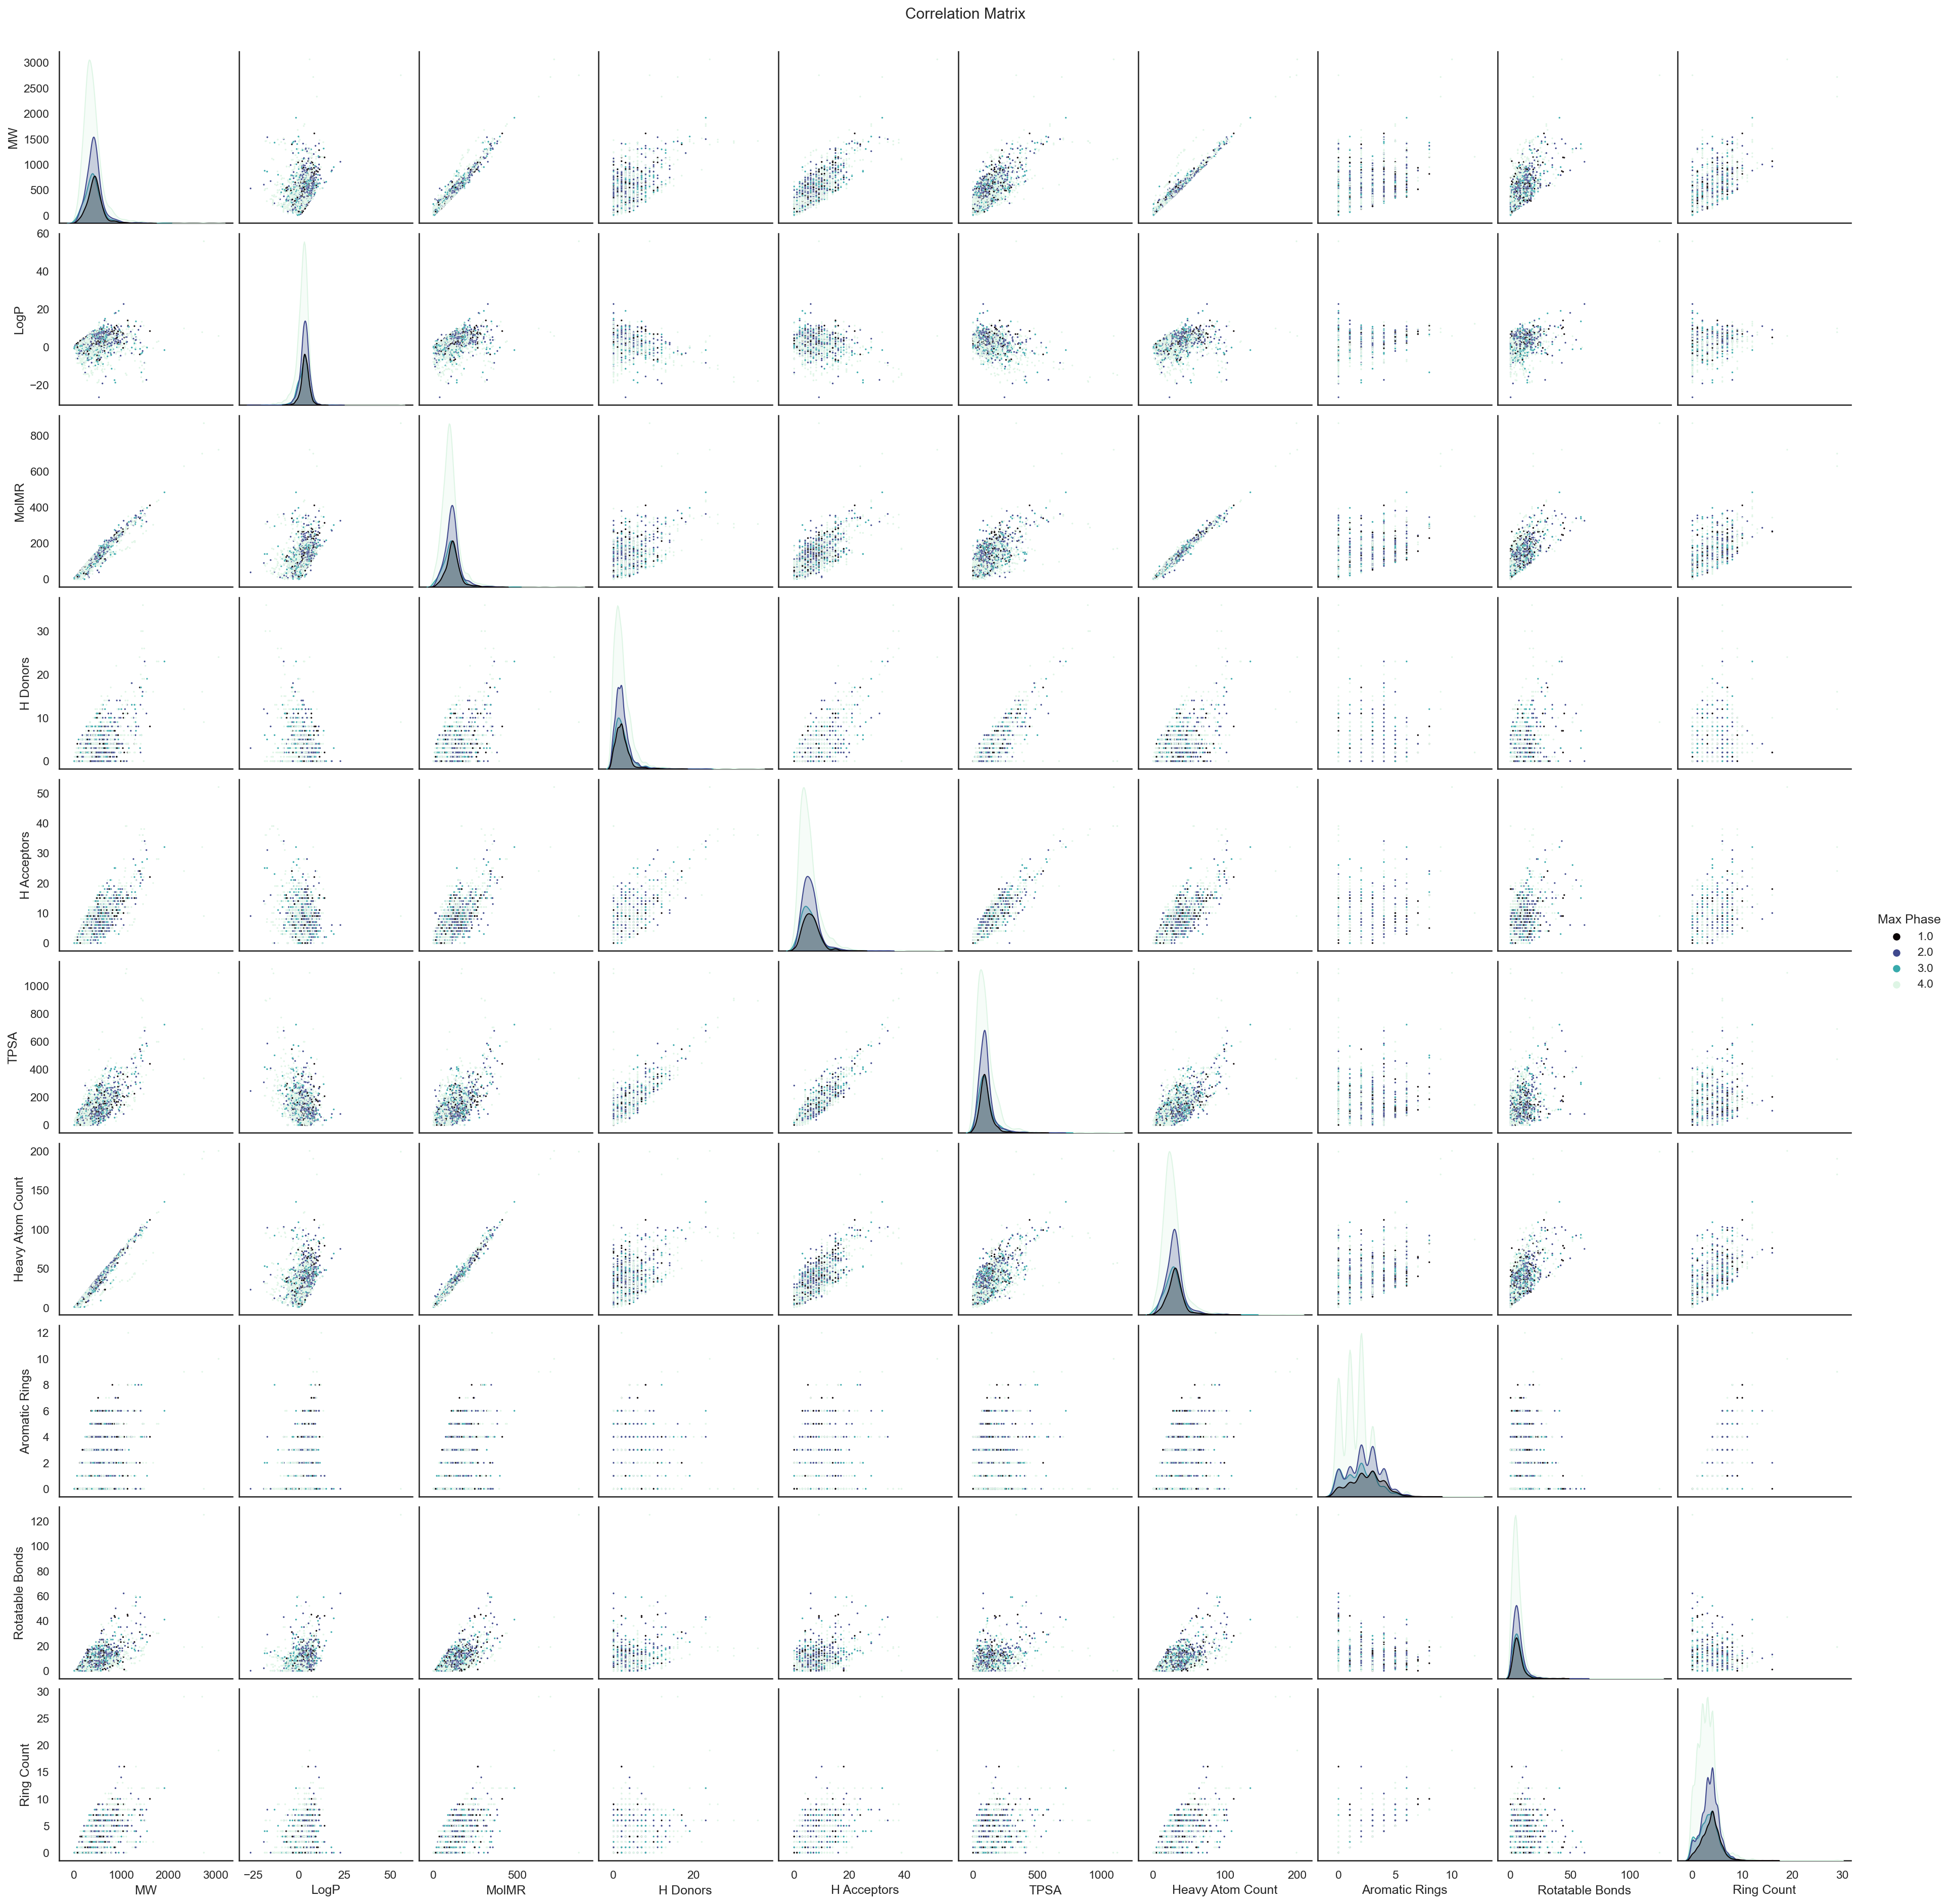

In [33]:
plt.figure(figsize=(7,5))

df1_subset1 = df1[['Max Phase', 'MW', 'LogP', 'MolMR', 'H Donors',
       'H Acceptors', 'TPSA', 'Heavy Atom Count', 'Aromatic Rings',
       'Rotatable Bonds', 'Ring Count']]

graph = sns.pairplot(df1_subset1, hue='Max Phase', plot_kws={"s": 3}, palette='mako')
graph.fig.suptitle('Correlation Matrix', y=1.01)
plt.show()

In [152]:
# function that performs the Kruskal-Wallis H-test

def kruskalwallis(descriptor, verbose=False): 
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import kruskal

    #array
    results = ({'Parameter':[], 'K-W Statistic':[], 'p':[],
                'alpha':[], 'Interpretation':[]})

    final_df = pd.DataFrame(results)
    
    # seed the random number generator
    seed(1)

    for i in descriptor:
        
        # phases
        selection = [i, 'Max Phase']
        df = df1[selection]
        phase1 = df[df['Max Phase'] == 1.0]
        phase1 = phase1[i]

        selection = [i, 'Max Phase']
        df = df1[selection]
        phase2 = df[df['Max Phase'] == 2.0]
        phase2 = phase2[i]

        selection = [i, 'Max Phase']
        df = df1[selection]
        phase3 = df[df['Max Phase'] == 3.0]
        phase3 = phase3[i]

        selection = [i, 'Max Phase']
        df = df1[selection]
        phase4 = df[df['Max Phase'] == 4.0]
        phase4 = phase4[i]

        # compare samples
        stat, p = kruskal(phase1, phase2, phase3, phase4)
        #print('Statistics=%.3f, p=%.3f' % (stat, p))

        # interpret
        alpha = 0.05
        if p > alpha:
            interpretation = 'Same distribution (fail to reject H0)'
        else:
            interpretation = 'Different distribution (reject H0)'

        new_row = pd.DataFrame({'Parameter':[i], 'K-W Statistic':[stat], 'p':[p], 'alpha':[alpha], 'Interpretation':[interpretation]})
        
        final_df = pd.concat([new_row, final_df.loc[:]]).reset_index(drop=True)
        
        
    filename = 'kruskalwallis_results.csv'
    final_df.to_csv(f'data/{filename}', index=False)

    return final_df

In [153]:
features = ['MW', 'LogP', 'MolMR', 'H Donors',
       'H Acceptors', 'TPSA', 'Heavy Atom Count', 'Aromatic Rings',
       'Rotatable Bonds', 'Ring Count']

#statistically compares the molecular features of the different clinical phases (1-4) for small molecules
kruskalwallis(features)

,Parameter,K-W Statistic,p,alpha,Interpretation
0,Ring Count,261.019216,2.706001e-56,0.05,Different distribution (reject H0)
1,Rotatable Bonds,62.609998,1.627238e-13,0.05,Different distribution (reject H0)
2,Aromatic Rings,425.739148,5.880943e-92,0.05,Different distribution (reject H0)
3,Heavy Atom Count,211.312168,1.515615e-45,0.05,Different distribution (reject H0)
4,TPSA,44.238261,1.343157e-09,0.05,Different distribution (reject H0)
5,H Acceptors,129.252845,7.835800e-28,0.05,Different distribution (reject H0)
6,H Donors,14.526978,2.268927e-03,0.05,Different distribution (reject H0)
7,MolMR,181.070436,5.179610e-39,0.05,Different distribution (reject H0)
8,LogP,203.490606,7.428607e-44,0.05,Different distribution (reject H0)
9,MW,149.041762,4.241035e-32,0.05,Different distribution (reject H0)
